In [47]:
import os, sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [48]:
read_data = pd.read_csv('2019_4_2_02379003-6369-43bf-b444-842420685d06.csv')


In [49]:
read_data.columns

Index(['clientId', 'clientIncome', 'incomeVerified', 'clientAge',
       'clientGender', 'clientMaritalStatus', 'clientLoanPurpose',
       'clientResidentialStauts', 'clientState', 'clientTimeAtEmployer',
       'clientNumberPhoneContacts', 'clientAvgCallsPerDay', 'loanType',
       'loanNumber', 'applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt', 'loanAmount',
       'interestRate', 'loanTerm', 'max_amount_taken', 'max_tenor_taken',
       'paymentRatio', 'FirstPaymentDefault', 'loanDefault'],
      dtype='object')

In [50]:
read_data['incomeVerified'][read_data['incomeVerified'] == 'true'] = 1
read_data['incomeVerified'][read_data['incomeVerified'] == 'false'] = 0

In [51]:
read_data = read_data.drop('loanType', axis = 1)

In [52]:
read_data['clientResidentialStauts'][read_data['clientResidentialStauts']== 'Null'] = 'Rented'

In [53]:
read_data['clientState'][read_data['clientState'] == 'Null'] = 'LAGOS'
read_data['clientState'].value_counts()

LAGOS          60667
OGUN           14798
ABUJA          13999
OYO            12731
RIVERS          7829
DELTA           5081
KWARA           3969
OSUN            3816
ONDO            3571
KADUNA          3496
EDO             2663
NIGER           2462
BENUE           2043
EKITI           2023
AKWA IBOM       1960
KOGI            1896
PLATEAU         1715
CROSS RIVER     1608
NASARAWA        1589
ENUGU           1566
ANAMBRA         1496
ABIA            1426
IMO             1287
KANO            1233
BAYELSA         1179
ADAMAWA          569
BAUCHI           418
SOKOTO           398
EBONYI           392
TARABA           336
KEBBI            279
GOMBE            265
KATSINA          248
ZAMFARA          221
BORNO            210
YOBE              83
JIGAWA            72
OJO                1
LAGOS              1
Name: clientState, dtype: int64

In [54]:
read_data['clientMaritalStatus'].value_counts()

Married      85492
Single       71361
Separated     1795
Widowed        939
Null             6
Divorced         3
Name: clientMaritalStatus, dtype: int64

In [55]:
read_data['clientMaritalStatus'][read_data['clientMaritalStatus']== 'Null'] = 'Married'

In [56]:
read_data['clientLoanPurpose'].value_counts()

business     78976
other        31554
house        22240
education    15737
medical      11089
Name: clientLoanPurpose, dtype: int64

In [57]:
read_data['clientResidentialStauts'].value_counts()

Rented               101670
Own Residence         26406
Family Owned          25668
Employer Provided      5589
Temp. Residence         263
Name: clientResidentialStauts, dtype: int64

In [58]:
data = pd.get_dummies(read_data,prefix_sep = '_', columns = ['clientGender', 'clientState', 'clientMaritalStatus',
                                         'clientLoanPurpose', 'clientResidentialStauts'])

In [59]:
data.head(3)

,clientId,clientIncome,incomeVerified,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,applicationDate,approvalDate,...,clientLoanPurpose_business,clientLoanPurpose_education,clientLoanPurpose_house,clientLoanPurpose_medical,clientLoanPurpose_other,clientResidentialStauts_Employer Provided,clientResidentialStauts_Family Owned,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence
0,719046128,25000.00,1,38,36+,2976,51.40909090909091,4,2018-03-18,2018-03-18,...,1,0,0,0,0,0,0,0,1,0
1,821565030,105000.00,0,31,36+,1159,121.03645833333333,4,2018-01-06,2018-01-06,...,0,0,1,0,0,0,0,0,1,0
2,703822576,78029.19,1,38,36+,1375,13.402912621359222,4,2018-04-27,2018-04-27,...,0,1,0,0,0,0,1,0,0,0


In [60]:
data = data.drop(['applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt'], axis = 1)

In [61]:
x = data.drop(['clientId', 'clientNumberPhoneContacts'], axis = 1)

In [62]:
for k in x.columns:
    value = sum([isinstance(i, str) for i in x[k]])
    if value > 1:
        print(k, value)
    else:
        pass

incomeVerified 103
clientTimeAtEmployer 159596
clientAvgCallsPerDay 159596


In [63]:
x['incomeVerified'].value_counts()

0       133286
1        26207
Null       103
Name: incomeVerified, dtype: int64

In [64]:
x['incomeVerified'][x['incomeVerified']== 'Null'] = 0

In [65]:
x['clientTimeAtEmployer'][x['clientTimeAtEmployer']== 'Null'] = 36

In [66]:
x = x.drop(['clientTimeAtEmployer', 'clientAvgCallsPerDay'], axis = 1)

In [67]:
'loanDefault' in x.columns

True

In [68]:
target = x['loanDefault']
x = x.drop('loanDefault', axis = 1)
target.shape

(159596,)

# feature selection

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func =chi2, k = 10)
fit = test.fit(x,target)

In [72]:
# summarize scores
np.set_printoptions(precision = 3)
print(fit.scores_)

[  2.060e+07   3.275e+02   5.687e+02   1.774e+03   1.050e+06   1.497e+03
   2.434e+02   4.778e+02   1.465e+02   4.024e+04   4.386e+04   7.575e+01
   3.449e+01   1.218e-02   8.140e+01   1.773e+00   1.658e+00   5.117e+00
   2.669e+00   9.298e+00   9.388e+00   2.259e+00   2.538e-01   2.758e+00
   4.705e+00   4.986e-01   5.502e+01   1.777e+00   5.008e-01   3.192e+00
   1.829e+00   9.236e-01   1.051e+01   1.838e+00   8.678e+00   6.232e+01
   6.619e+01   1.533e+02   3.887e-01   8.600e-02   1.393e+02   1.625e+01
   2.573e+00   2.665e+01   6.814e+01   1.203e+02   3.348e+00   1.188e+00
   3.912e-01   1.611e-02   2.976e-01   7.739e-02   4.251e-02   3.736e+01
   3.664e+00   5.172e+01   2.998e+00   4.299e+02   4.079e+01   2.212e+02
   1.163e+01   3.178e+02   6.109e+01   1.793e+00   1.464e+01   2.981e-01
   3.633e-02]


In [73]:
features = fit.transform(x)
# summarize selected features
print(features[0:5,:])

[[  2.500e+04   1.000e+00   3.800e+01   4.000e+00   4.800e+04   7.500e+00
    1.000e+00   0.000e+00   1.000e+00   1.000e+00]
 [  1.050e+05   0.000e+00   3.100e+01   4.000e+00   3.150e+04   1.250e+01
    1.000e+00   0.000e+00   0.000e+00   0.000e+00]
 [  7.803e+04   1.000e+00   3.800e+01   4.000e+00   1.295e+05   5.000e+00
    1.000e+00   0.000e+00   0.000e+00   0.000e+00]
 [  3.500e+04   1.000e+00   4.100e+01   3.000e+00   1.750e+04   1.250e+01
    1.000e+00   0.000e+00   0.000e+00   0.000e+00]
 [  3.500e+05   1.000e+00   4.000e+01   2.000e+00   1.325e+05   1.250e+01
    1.000e+00   0.000e+00   1.000e+00   1.000e+00]]


In [74]:
x.shape, features.shape

((159596, 67), (159596, 10))

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components = 2)
pmodel = pca.fit_transform(x)

In [77]:
pca.explained_variance_ratio_.sum()

0.99999991353114015

In [78]:
principalDf = pd.DataFrame(data = pmodel, columns = ['principal component 1', 'principal component 2'])

In [79]:
# display principal components
principalDf.head()

,principal component 1,principal component 2
0,-64458.453741,18454.488372
1,13766.816133,-5062.749725
2,-4422.734353,94940.114792
3,-57197.704160,-12811.086747
4,266745.894982,73852.253484


In [80]:
target.shape

(159596,)

In [81]:
principalDf['target'] = target

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [83]:
min_max = MinMaxScaler()
std = StandardScaler()
norm = Normalizer()

x_new = min_max.fit_transform(features)
x_std = std.fit_transform(x_new)
x_norm = std.fit_transform(x_std)

In [84]:
target.shape

(159596,)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.4, random_state = 42)

In [86]:
x_train_dataframe = pd.DataFrame(x_train)
x_test_dataframe = pd.DataFrame(x_test)
y_train_dataframe = pd.DataFrame(y_train)
y_test_dataframe = pd.DataFrame(y_test)


x_train_dataframe.to_csv('x_train.csv')
x_test_dataframe.to_csv('x_test.csv')
y_train_dataframe.to_csv('y_train.csv')
y_test_dataframe.to_csv('y_test.csv')

In [87]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [88]:
log.fit(x_train, y_train)
log.score(x_train, y_train)

0.72023977359357538

In [89]:
prediction = log.predict(x_test)

In [90]:
prediction.shape

(63839,)

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [92]:
train_score = tree.score(x_train, y_train)
prediction = log.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
train_score, test_score

(0.99679396806499787, 0.71990476041291374)

In [93]:
for i in range(3,10):
    tree = DecisionTreeClassifier(random_state = 0, max_depth = i)
    tree.fit(x_train, y_train)
    train_score = tree.score(x_train, y_train)
    prediction = log.predict(x_test)
    from sklearn.metrics import accuracy_score
    test_score = accuracy_score(prediction, y_test)
    print(train_score, test_score)

0.847666489134 0.719904760413
0.849138966342 0.719904760413
0.849149409443 0.719904760413
0.850486126341 0.719904760413
0.850966508976 0.719904760413
0.853243104943 0.719904760413
0.854893114864 0.719904760413


In [94]:
tree.feature_importances_

array([  5.508e-03,   0.000e+00,   3.791e-03,   5.851e-03,   4.153e-03,
         6.104e-03,   1.104e-02,   1.922e-04,   1.307e-03,   1.708e-01,
         7.795e-01,   2.423e-04,   6.501e-04,   3.234e-04,   4.447e-04,
         0.000e+00,   1.192e-04,   1.115e-04,   8.175e-05,   2.656e-04,
         0.000e+00,   2.967e-04,   0.000e+00,   1.033e-04,   8.176e-05,
         2.514e-04,   1.181e-04,   8.397e-05,   4.056e-05,   1.027e-04,
         0.000e+00,   1.052e-04,   1.436e-04,   1.466e-04,   5.304e-05,
         9.671e-05,   1.299e-04,   0.000e+00,   0.000e+00,   4.631e-05,
         1.923e-04,   7.456e-04,   0.000e+00,   4.781e-04,   4.213e-04,
         2.775e-04,   3.249e-04,   8.740e-05,   9.937e-05,   1.071e-04,
         9.077e-05,   0.000e+00,   0.000e+00,   6.028e-04,   2.328e-04,
         2.648e-04,   0.000e+00,   8.129e-04,   8.628e-04,   3.534e-04,
         1.807e-04,   6.095e-04,   1.632e-04,   2.478e-04,   3.345e-04,
         2.709e-04,   4.930e-05])

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [96]:
forest.score(x_train, y_train)

0.97373560157481964

In [97]:
prediction = forest.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
test_score

0.83151365152962919

In [98]:
for i in [100,150,200,250]:
    tree = RandomForestClassifier(random_state = 0, n_estimators = i)
    tree.fit(x_train, y_train)
    train_score = tree.score(x_train, y_train)
    prediction = log.predict(x_test)
    from sklearn.metrics import accuracy_score
    test_score = accuracy_score(prediction, y_test)
    print(train_score, test_score)

0.996752195662 0.719904760413
0.996793968065 0.719904760413
0.996793968065 0.719904760413
0.996793968065 0.719904760413


In [215]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest, x_train, y_train, cv = 4, scoring = 'accuracy')

array([ 0.837,  0.837,  0.841,  0.836])

In [218]:
y_test.shape, prediction.shape

((63839,), (63839,))

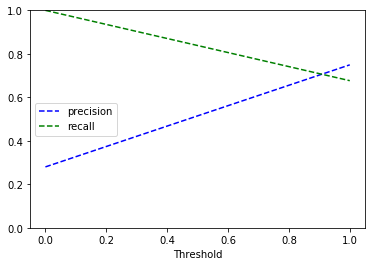

In [220]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

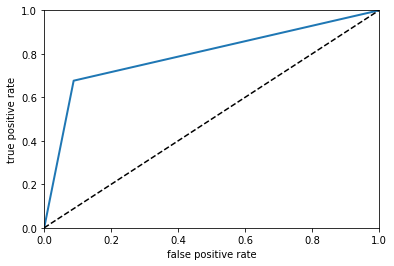

In [222]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

In [223]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.79428446970103606

In [ ]:
from sk.metrics.con

In [234]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
cross_val_score(forest, x_train, y_train, cv = 3, scoring = 'accuracy')
y_train_pred = cross_val_predict(forest, x_train, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[63425,  5543],
       [ 9908, 16881]])

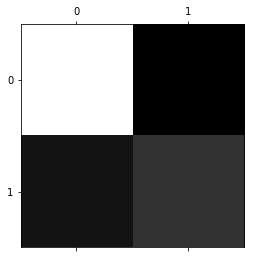

In [235]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

# GradientBoosting classifier

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
for i in range(2,10):
    gbrt = GradientBoostingClassifier(random_state = 0, max_depth = i)
    gbrt.fit(x_train, y_train)
    print(gbrt.score(x_train, y_train),gbrt.score(x_test, y_test))

0.849065864637 0.85021695202
0.850308593628 0.850545904541
0.851248472697 0.849887999499
0.852574746494 0.850295274049
0.855853880134 0.849527718166
0.857744081373 0.848948135152
0.860271311758 0.848572189414
0.86316405067 0.848023935212


# Neural Network with scikit learn

In [202]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver = 'lbfgs', activation = 'relu', random_state = 0).fit(x_train, y_train)


In [203]:
mlp.score(x_train, y_train)

0.84854370959825387

In [204]:
mlp = MLPClassifier(solver = 'lbfgs', activation = 'logistic', random_state = 0, hidden_layer_sizes = [10]).fit(x_train, y_train)
mlp.score(x_train, y_train), mlp.score(x_test, y_test)

(0.84725920820409995, 0.8493710741083037)

In [205]:
mlp = MLPClassifier(solver = 'lbfgs', max_iter = 1000, alpha = 1, activation = 'logistic', random_state = 0, hidden_layer_sizes = [10]).fit(x_train, y_train)
mlp.score(x_train, y_train), mlp.score(x_test, y_test)

(0.84738452541328568, 0.84940240291984526)

In [384]:
import tensorflow as tf
import keras

In [38]:
# precetrons
from sklearn.linear_model import Perceptron
per_clf = Perceptron(random_state = 42)
per_clf.fit(x_train, y_train)
y_pred = per_clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_pred, y_test)
per_clf.score(x_train, y_train),test_score

(0.84050252200883491, 0.84214978304798005)

# Tensorlfow higher level API

In [239]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_norm)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300,100], n_classes = 2,
                                  feature_columns = feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(x_norm, target,batch_size = 100, steps = 20000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021EC8840B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\INVENTAR\\AppData\\Local\\Temp\\tmp5tlx89ug'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no 

INFO:tensorflow:global_step/sec: 204.52
INFO:tensorflow:loss = 0.2782, step = 6601 (0.485 sec)
INFO:tensorflow:global_step/sec: 206.093
INFO:tensorflow:loss = 0.338286, step = 6701 (0.489 sec)
INFO:tensorflow:global_step/sec: 205.983
INFO:tensorflow:loss = 0.276604, step = 6801 (0.481 sec)
INFO:tensorflow:global_step/sec: 207.305
INFO:tensorflow:loss = 0.288703, step = 6901 (0.482 sec)
INFO:tensorflow:global_step/sec: 206.809
INFO:tensorflow:loss = 0.481335, step = 7001 (0.499 sec)
INFO:tensorflow:global_step/sec: 199.227
INFO:tensorflow:loss = 0.460785, step = 7101 (0.494 sec)
INFO:tensorflow:global_step/sec: 203.276
INFO:tensorflow:loss = 0.324349, step = 7201 (0.488 sec)
INFO:tensorflow:global_step/sec: 205.698
INFO:tensorflow:loss = 0.221085, step = 7301 (0.490 sec)
INFO:tensorflow:global_step/sec: 217.105
INFO:tensorflow:loss = 0.369403, step = 7401 (0.453 sec)
INFO:tensorflow:global_step/sec: 220.776
INFO:tensorflow:loss = 0.262691, step = 7501 (0.469 sec)
INFO:tensorflow:global_

INFO:tensorflow:loss = 0.374142, step = 14901 (0.457 sec)
INFO:tensorflow:global_step/sec: 213.041
INFO:tensorflow:loss = 0.461166, step = 15001 (0.469 sec)
INFO:tensorflow:global_step/sec: 219.572
INFO:tensorflow:loss = 0.50199, step = 15101 (0.455 sec)
INFO:tensorflow:global_step/sec: 211.476
INFO:tensorflow:loss = 0.304045, step = 15201 (0.481 sec)
INFO:tensorflow:global_step/sec: 215.401
INFO:tensorflow:loss = 0.318741, step = 15301 (0.456 sec)
INFO:tensorflow:global_step/sec: 214.863
INFO:tensorflow:loss = 0.329337, step = 15401 (0.465 sec)
INFO:tensorflow:global_step/sec: 212.014
INFO:tensorflow:loss = 0.339571, step = 15501 (0.476 sec)
INFO:tensorflow:global_step/sec: 216.063
INFO:tensorflow:loss = 0.363548, step = 15601 (0.459 sec)
INFO:tensorflow:global_step/sec: 219.206
INFO:tensorflow:loss = 0.337681, step = 15701 (0.456 sec)
INFO:tensorflow:global_step/sec: 213.786
INFO:tensorflow:loss = 0.330242, step = 15801 (0.468 sec)
INFO:tensorflow:global_step/sec: 217.932
INFO:tensor

SKCompat()

In [245]:
y_pred = dnn_clf.predict(x_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\INVENTAR\AppData\Local\Temp\tmp5tlx89ug\model.ckpt-20000


0.85081219943921427

In [373]:
x_train.shape

(95757, 4)

In [56]:
nn_architecture = [
    {"input_dim": 4, "output_dim": 8, "activation": "relu"},
    {"input_dim": 8, "output_dim": 12, "activation": "relu"},
    {"input_dim": 12, "output_dim": 8, "activation": "relu"},
    {"input_dim": 8, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

In [69]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}
    
    for ids, layer in enumerate(nn_architecture):
        layer_idx = ids + 1
        layer_input_size = layer['input_dim']
        layer_output_size = layer['output_dim']
        
        
        params_values['W' + str(layer_idx)] = np.random.randn(layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(layer_output_size, 1) * 0.1
        
    return params_values

# Keras implementation of Neural networks

In [38]:
# model

import keras, tensorflow

from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = 4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [42]:
# compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 100, steps_per_epoch = 10)

Epoch 1/100
10/10 [==============================] - 1s 120ms/step - loss: 0.6985 - acc: 0.4310
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6792 - acc: 0.5594
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6650 - acc: 0.6404
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6528 - acc: 0.7247
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6412 - acc: 0.7976
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6304 - acc: 0.8270
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6197 - acc: 0.8408
Epoch 8/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6084 - acc: 0.8439
Epoch 9/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5967 - acc: 0.8447
Epoch 10/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5851 - acc: 0.8448
Epoch 11/100
10/10 [============================

10/10 [==============================] - 0s 14ms/step - loss: 0.3501 - acc: 0.8447
Epoch 87/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3500 - acc: 0.8447
Epoch 88/100
10/10 [==============================] - 0s 15ms/step - loss: 0.3499 - acc: 0.8448
Epoch 89/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3499 - acc: 0.8448
Epoch 90/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3498 - acc: 0.8448
Epoch 91/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3497 - acc: 0.8449
Epoch 92/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3496 - acc: 0.8449
Epoch 93/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3496 - acc: 0.8449
Epoch 94/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3495 - acc: 0.8449
Epoch 95/100
10/10 [==============================] - 0s 13ms/step - loss: 0.3494 - acc: 0.8449
Epoch 96/100
10/10 [==============================] -

In [45]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

95757/95757 [==============================] - 2s 17us/step

acc: 84.50%


In [46]:
prediction = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction.round(), y_test)
scores[1]*100, test_score*100

(84.497216913894974, 84.705274205423024)

In [245]:

model = Sequential()
model.add(Dense(300, input_dim = 4, activation = 'relu')) # layer 1
model.add(Dense(800, activation = 'relu')) # layer 2
model.add(Dense(500, activation = 'relu')) # layer 3
model.add(Dense(200, activation = 'relu')) # layer 5
model.add(Dense(10, activation = 'relu')) # layer 6
model.add(Dense(1, activation = 'sigmoid'))

In [246]:
# compile model
import tensorflow as tf
learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 20, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 140s 14s/step - loss: 0.6931 - acc: 0.5121
Epoch 2/20
10/10 [==============================] - 72s 7s/step - loss: 0.6796 - acc: 0.7619
Epoch 3/20
10/10 [==============================] - 72s 7s/step - loss: 0.6686 - acc: 0.7966
Epoch 4/20
10/10 [==============================] - 72s 7s/step - loss: 0.6582 - acc: 0.8153
Epoch 5/20
10/10 [==============================] - 72s 7s/step - loss: 0.6484 - acc: 0.8208
Epoch 6/20
10/10 [==============================] - 72s 7s/step - loss: 0.6389 - acc: 0.8234
Epoch 7/20
10/10 [==============================] - 72s 7s/step - loss: 0.6298 - acc: 0.8253
Epoch 8/20
10/10 [==============================] - 72s 7s/step - loss: 0.6209 - acc: 0.8272
Epoch 9/20
10/10 [==============================] - 72s 7s/step - loss: 0.6123 - acc: 0.8284
Epoch 10/20
10/10 [==============================] - 72s 7s/step - loss: 0.6038 - acc: 0.8288
Epoch 11/20
10/10 [==============================] - 72s 7s/step - 

In [247]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

95757/95757 [==============================] - 17s 178us/step

acc: 83.45%


In [248]:
prediction = model.predict(x_test)

In [249]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction.round(), y_test)
scores[1]*100, test_score*100

(83.446640976763277, 83.599367158006871)

In [252]:

model = Sequential()
model.add(Dense(300, input_dim = 4, activation = 'relu')) 
model.add(Dense(1000, activation = 'relu')) 
model.add(Dense(400, activation = 'relu')) 
model.add(Dense(10, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

In [253]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 20, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 62s 6s/step - loss: 0.6829 - acc: 0.7769
Epoch 2/20
10/10 [==============================] - 55s 5s/step - loss: 0.6698 - acc: 0.8331
Epoch 3/20
10/10 [==============================] - 55s 5s/step - loss: 0.6552 - acc: 0.8327
Epoch 4/20
10/10 [==============================] - 55s 6s/step - loss: 0.6383 - acc: 0.8313
Epoch 5/20
10/10 [==============================] - 55s 6s/step - loss: 0.6184 - acc: 0.8293
Epoch 6/20
10/10 [==============================] - 56s 6s/step - loss: 0.5964 - acc: 0.8273
Epoch 7/20
10/10 [==============================] - 56s 6s/step - loss: 0.5757 - acc: 0.8267
Epoch 8/20
10/10 [==============================] - 56s 6s/step - loss: 0.5569 - acc: 0.8267
Epoch 9/20
10/10 [==============================] - 57s 6s/step - loss: 0.5401 - acc: 0.8273
Epoch 10/20
10/10 [==============================] - 60s 6s/step - loss: 0.5249 - acc: 0.8281
Epoch 11/20
10/10 [==============================] - 59s 6s/step - lo

In [280]:

model = Sequential()
model.add(Dense(300, input_dim = 4, activation = 'relu')) 
model.add(Dense(800, activation = 'relu')) 
model.add(Dense(100, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

In [281]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, steps_per_epoch = 10)

Epoch 1/10
10/10 [==============================] - 45s 4s/step - loss: 0.5007 - acc: 0.7909
Epoch 2/10
10/10 [==============================] - 34s 3s/step - loss: 0.3558 - acc: 0.8427
Epoch 3/10
10/10 [==============================] - 35s 3s/step - loss: 0.3502 - acc: 0.8460
Epoch 4/10
10/10 [==============================] - 35s 3s/step - loss: 0.3476 - acc: 0.8463
Epoch 5/10
10/10 [==============================] - 35s 3s/step - loss: 0.3469 - acc: 0.8465
Epoch 6/10
10/10 [==============================] - 35s 4s/step - loss: 0.3465 - acc: 0.8465
Epoch 7/10
10/10 [==============================] - 35s 3s/step - loss: 0.3462 - acc: 0.8472
Epoch 8/10
10/10 [==============================] - 35s 4s/step - loss: 0.3460 - acc: 0.8472
Epoch 9/10
10/10 [==============================] - 37s 4s/step - loss: 0.3458 - acc: 0.8474
Epoch 10/10
10/10 [==============================] - 35s 4s/step - loss: 0.3457 - acc: 0.8479


In [284]:

model = Sequential()
model.add(Dense(500, input_dim = 4, activation = 'relu')) 
model.add(Dense(800, activation = 'relu')) 
model.add(Dense(300, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

In [285]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, steps_per_epoch = 10)

Epoch 1/10
10/10 [==============================] - 71s 7s/step - loss: 0.4578 - acc: 0.7867
Epoch 2/10
10/10 [==============================] - 63s 6s/step - loss: 0.3575 - acc: 0.8437
Epoch 3/10
10/10 [==============================] - 63s 6s/step - loss: 0.3494 - acc: 0.8462
Epoch 4/10
10/10 [==============================] - 63s 6s/step - loss: 0.3478 - acc: 0.8466
Epoch 5/10
10/10 [==============================] - 63s 6s/step - loss: 0.3469 - acc: 0.8469
Epoch 6/10
10/10 [==============================] - 6209s 621s/step - loss: 0.3464 - acc: 0.8471
Epoch 7/10
10/10 [==============================] - 50s 5s/step - loss: 0.3461 - acc: 0.8473
Epoch 8/10
10/10 [==============================] - 50s 5s/step - loss: 0.3459 - acc: 0.8477
Epoch 9/10
10/10 [==============================] - 49s 5s/step - loss: 0.3457 - acc: 0.8478
Epoch 10/10
10/10 [==============================] - 49s 5s/step - loss: 0.3456 - acc: 0.8482


In [ ]:
# Neural nets
n_input = 4
n_hidden1 = 300
n_hidden2 = 500
n_hidden3 = 20
n_output = 1


#he_init = tf.contrib.layers.variance_scaling_initializer()
#hidden1 = tf.layers.dense(x_train, n_hidden1, activation = tf.nn.relu,
#                         kernel_initializer =he_init, name = 'hidden1')
import tensorflow as tf


X = tf.placeholder(tf.float32, shape = (None, n_input), name = 'X')
y = tf.placeholder(tf.int32, shape = (None), name = 'y')


training = tf.placeholder_with_default(False, shape = (), name = 'training')
with tf.var_scope('dnn', reuse = True):
    hidden1 = tf.layers.dense(X, n_hidden1, name = 'hidden1',
                             activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = 'hidden2',
                              activation = tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name = 'hidden3',
                             activation = tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name = 'outputs')
    


In [ ]:
training = tf.placeholder_with_default(False, shape = (), name = 'training')

hidden1 = tf.layers.dense(X, n_hidden1, name = 'hidden1')
bn1 = tf.layers.batch_normalization(hidden1, training = training, momentum = 0.9)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = 'hidden2')
bn2 = tf.layers.batch_normalization(hidden2, training = training, momentum = 0.9)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name = 'outputs')
logits = tf.layers.batch_normalization(logits_before_bn, training = training,
                                      momentum = 0.9)

In [221]:
from sklearn.model_selection import train_test_split
val_x_train, val_x_test, val_y_train, val_y_test = train_test_split(x_test, y_test, test_size = 0.3, random_state = 42)

In [226]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [235]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

n_epochs = 20 
batch_size = 300

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    start, stop = 0,0
    for epoch in range(n_epochs):
        train = []
        for iteration in range(x_train.shape[1]//batch_size):
            stop = start + batch_size
            x_batch, y_batch = x_train[start:stop], y_train[start:stop]
            sess.run([training_op, extra_update_ops],
                     feed_dict = {training:True, X: x_batch, y: y_batch})
            start = stop
            acc_train = accuracy.eval(feed_dict = {X: x_batch, y: y_batch})
            print(acc_train)
            train.append(acc_train)
        #accuracy_val = accuracy.eval(feed_dict = {X:val_x_train, y:val_y_train})
        #acc_train = accuracy.eval(feed_dict = {X: x_batch, y: y_batch})
        #acc_val = accuracy.eval(feed_dict = {X: x_val, y: y_val})
        #print(epoch, 'Train accuracy: ', acc_train, 'val_accuracy: ', acc_val)
        #print(epoch, "Train accuracy: ", sum(train)/len(train))
    save_path = saver.save(sess, './my_model_final_k.ckpt')
            

In [200]:
# training DNN using pure Tensorflow

n_inputs =4
n_hidden1 = 20
n_hidden2 = 15
n_outputs = 1


X = tf.placeholder(tf.float32, shape = (200, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (200), name = 'y')

In [377]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [378]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [379]:
inint = tf.global_variables_initializer()
saver = tf.train.Saver()

In [42]:
x_val, test_x, y_val, test_y = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42)

In [323]:
x_train.shape

(95757, 4)

# SPECIAL

In [364]:
import keras
%load_ext keras


The keras module is not an IPython extension.


In [45]:
def best_feature_number(x, y, n_default):
    for i in range(3,n_default):
        test = SelectKBest(score_func =chi2, k = i)
        fit = test.fit(x,y)
        # summarize scores
        np.set_printoptions(precision = 3)
        features = fit.transform(x)
        
        from sklearn.preprocessing import MinMaxScaler
        from sklearn.preprocessing import StandardScaler
        from sklearn.preprocessing import Normalizer
        min_max = MinMaxScaler()
        std = StandardScaler()
        norm = Normalizer()

        x_new = min_max.fit_transform(features)
        x_std = std.fit_transform(x_new)
        x_norm = std.fit_transform(x_std)
        
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.4, random_state = 42)

        from sklearn.linear_model import LogisticRegression
        log = LogisticRegression()
        
        log.fit(x_train, y_train)
        value = log.score(x_train, y_train)

        prediction = log.predict(x_test)
        from sklearn.metrics import accuracy_score
        solution = accuracy_score(prediction, y_test)
        print(i, value,solution)
        
    return 
best_feature_number(x, target, n_default = 15)


3 0.84502438464 0.847209386112
4 0.843739883246 0.846050220085
5 0.848094656265 0.849825341876
6 0.847582944328 0.849559046978
7 0.84761427363 0.849042121587
8 0.847645602932 0.848854148718
9 0.847113004793 0.849433731731
10 0.847676932235 0.849183101239
11 0.847927566653 0.84910477921
12 0.848627254404 0.853381161986
13 0.848481050994 0.853443819609
14 0.848366176885 0.852989551841


# recursive feature elimination

In [100]:
from sklearn.feature_selection import RFE
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, target)
print('Num Features: %d' % fit.n_features_)
print('Selected Features: %s' % fit.support_)
print('Feature Ranking: %s' % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
Feature Ranking: [51  4 50 39 53 45 48 38  3  1  1  1  2 19 28 29 24 59 16 18 57 20 23 31 60
 26 43 37 36 54 56 30 22 62  5 41 49 27 64 34 17 33 63 40 46 42 25 32 58 44
 61 55 65 47 35 21 52 14 13 12 15 11  6 10  9  8  7]


In [101]:
for i, j in zip(fit.support_, x.columns):
    if i == True:
        print(j)
    else:
        pass

paymentRatio
FirstPaymentDefault
clientGender_FEMALE


In [102]:
new_feature = x[['paymentRatio', 'FirstPaymentDefault','clientGender_FEMALE']]

In [103]:
model.fit(new_feature, target)
model.score(new_feature, target)

0.84589839344344475

In [104]:
forest.fit(new_feature, target)
train = forest.score(new_feature, target)


In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_feature, target, test_size = 0.4, random_state = 42)


prediction = forest.predict(x_test)
from sklearn.metrics import accuracy_score
solution = accuracy_score(prediction, y_test)
print(train, solution)

0.845898393443 0.847209386112


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_feature, target, test_size = 0.4, random_state = 42)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
        
log.fit(x_train, y_train)
value = log.score(x_train, y_train)

prediction = log.predict(x_test)
from sklearn.metrics import accuracy_score
solution = accuracy_score(prediction, y_test)
print(value, solution)

0.84502438464 0.847209386112


# pca

In [51]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components = 4)
fit = pca.fit(x)
# summarize components
print('Explained Variance sum: %s' % fit.explained_variance_ratio_.sum())
print(fit.components_)

Explained Variance sum: 0.999999998299
[[  9.961e-01   4.229e-07   1.301e-05   4.636e-08   8.852e-02  -6.524e-06
    3.634e-05   1.618e-07  -1.899e-07  -4.987e-08  -2.082e-07  -3.738e-07
    3.738e-07  -2.603e-09   1.280e-07  -7.223e-09  -1.208e-08  -7.107e-09
   -1.228e-09  -5.389e-09  -2.191e-08   1.123e-09  -8.402e-09  -4.913e-09
   -5.113e-09  -1.553e-08  -1.431e-08   4.734e-09  -3.718e-09  -3.037e-09
   -8.295e-10  -1.794e-08   3.070e-09  -1.558e-09  -3.494e-09  -1.182e-08
   -2.956e-08   1.947e-07  -3.320e-11  -1.867e-08  -8.286e-09  -1.107e-07
   -2.167e-11  -3.031e-08  -1.334e-08  -3.127e-08  -1.535e-08   8.510e-08
   -4.632e-09  -4.561e-09  -1.697e-10  -1.588e-09   2.642e-11   7.972e-07
    1.020e-08  -8.105e-07   3.080e-09   1.865e-07  -1.003e-07  -3.599e-08
   -4.188e-08  -8.276e-09  -6.216e-08  -3.255e-07   5.195e-07  -1.250e-07
   -6.850e-09]
 [ -8.852e-02   5.363e-06   2.593e-05   2.227e-05   9.961e-01  -1.021e-04
    1.010e-03   3.759e-07   2.772e-07  -5.188e-07  -1.000e

In [56]:
fit.components_.shape

(4, 67)

# feature importance

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(new_feature, target)
print(model.feature_importances_)

[ 0.394  0.605  0.001]


In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_norm, target)
print(model.feature_importances_)

[ 0.109  0.06   0.372  0.459]


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(prediction, y_test)

0.84605022008490105

In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[41913  4045]
 [ 5783 12098]]


In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_test, prediction)

0.71114507406536553

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90     45958
          1       0.75      0.68      0.71     17881

avg / total       0.84      0.85      0.84     63839

